In [1]:
!pip install meteostat

In [25]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily
import seaborn as sns
import pandas as pd
from scipy import stats

In [3]:
fpath_ridership = r'C:\Users\mp5160\Desktop\UDA\Data\MTA_Daily_Ridership_Data__2020_-_2025_20250724.csv'

<Axes: xlabel='time'>

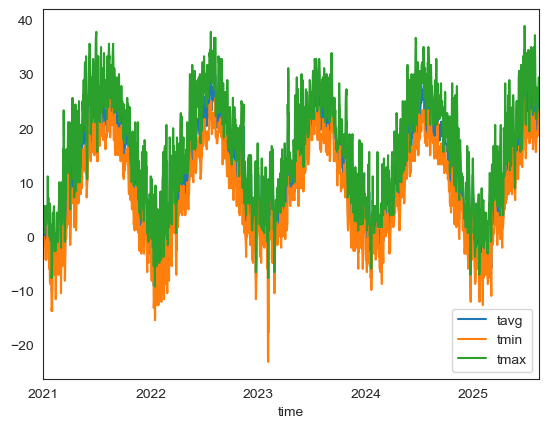

In [27]:

# Set time period
start = datetime(2021, 1, 1)
end = datetime(2025, 12, 31)

# Create Point for NYC
nyc = Point(42.34389081165582, -71.07208866602299)

# Get daily data for 2024
data = Daily(nyc, start, end)
df_weather = data.fetch()

# Plot line chart including average, minimum and maximum temperature
df_weather.plot(y=['tavg', 'tmin', 'tmax'])

In [28]:
df_weather.reset_index(inplace=True)
df_weather['Date_dt'] = pd.to_datetime(df_weather['time'])
df_weather.sample()

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,Date_dt
741,2023-01-12,1.3,-1.0,9.4,6.4,0.0,<NA>,14.0,<NA>,1022.4,0.0,2023-01-12


In [29]:
df_transit = pd.read_csv(fpath_ridership)
df_transit['Date_dt'] = pd.to_datetime(df_transit['Date'])
# df_transit = df_transit.loc[df_transit['Date_dt'].dt.year==2024]
df_transit.sample()

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day,Date_dt
1157,05/02/2023,3961858,0.69,1498566,0.66,211550,0.66,197217,0.69,29472,1.0,916459,0.95,7749,0.45,2023-05-02


In [31]:
df = pd.merge(left=df_transit, right=df_weather, on= 'Date_dt', how = 'inner' )

In [33]:
len(df)

1470

In [34]:
df['Avg_Temp_F'] = df['tavg'] * (9/5) + 32

In [19]:
# df.columns

Text(0, 0.5, 'Temperature (mean) F')

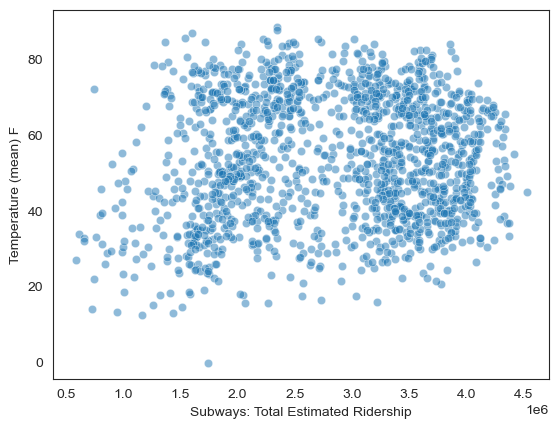

In [35]:
sns.scatterplot(data = df, x= 'Subways: Total Estimated Ridership', y = 'Avg_Temp_F',alpha = 0.5)
plt.ylabel('Temperature (mean) F')

<Axes: xlabel='Subways: Total Estimated Ridership', ylabel='Avg_Temp_F'>

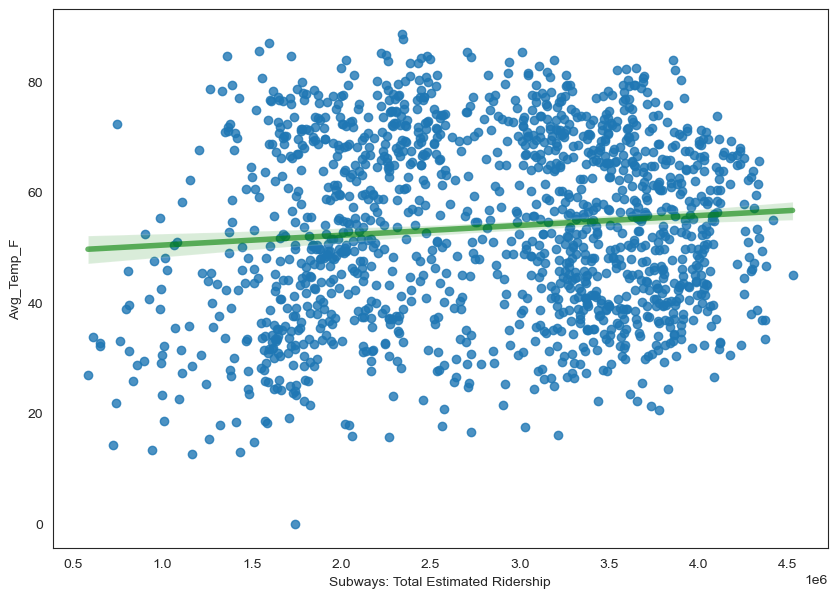

In [36]:
# set teh style
sns.set_style("white")

# seet the size
fig = plt.gcf()
# Changing Seaborn Plot size
fig.set_size_inches(10, 7)

# plot
sns.regplot(x=df['Subways: Total Estimated Ridership'], y=df['Avg_Temp_F'], line_kws={"color":"green","alpha":0.6,"lw":4})

In [37]:
# stats.pearsonr(x, y)
stats.pearsonr(df['Subways: Total Estimated Ridership'],df['Avg_Temp_F'])
# the first output is the correlation value and the second outcome is the p-value

PearsonRResult(statistic=np.float64(0.09527901035104469), pvalue=np.float64(0.0002539235068442398))

In [38]:
df['day_of_week'] = df['Date_dt'].dt.day_name()
df.sample()

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,...,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,Avg_Temp_F,day_of_week
563,07/18/2022,2720012,0.52,1209240,0.58,162178,0.51,132779,0.47,22670,...,27.8,3.8,0.0,<NA>,17.6,<NA>,1013.0,9.0,75.56,Monday


Text(0, 0.5, 'Temperature (mean) F')

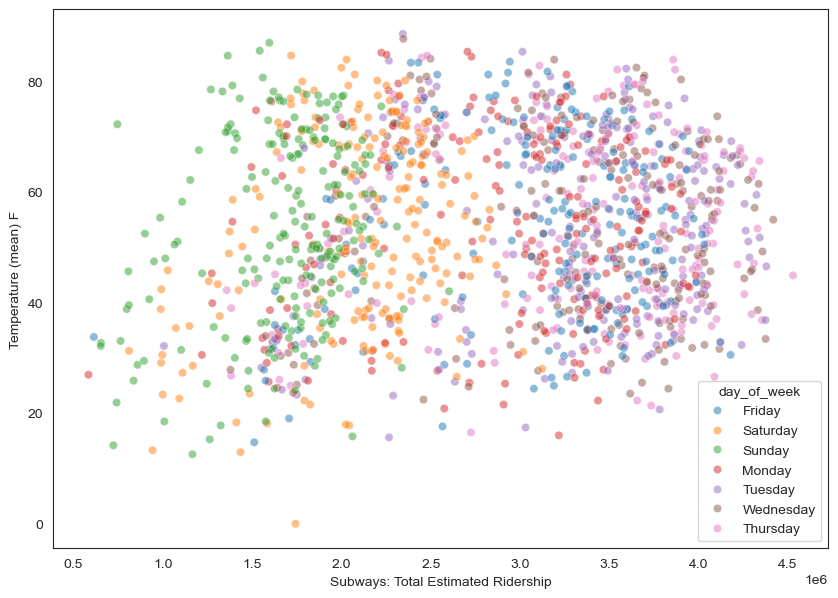

In [41]:
# seet the size
fig = plt.gcf()
# Changing Seaborn Plot size
fig.set_size_inches(10, 7)

sns.scatterplot(data = df, x= 'Subways: Total Estimated Ridership', y = 'Avg_Temp_F',alpha = 0.5,hue='day_of_week')
plt.ylabel('Temperature (mean) F')

<Axes: xlabel='Subways: Total Estimated Ridership', ylabel='Avg_Temp_F'>

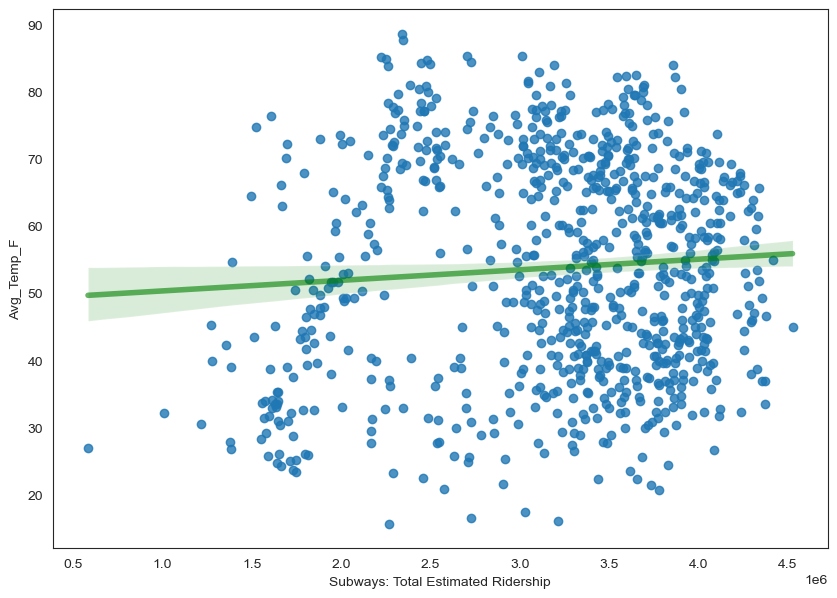

In [45]:
# set teh style
sns.set_style("white")

# seet the size
fig = plt.gcf()
# Changing Seaborn Plot size
fig.set_size_inches(10, 7)
df_monday = df.loc[df['day_of_week'].isin(['Monday','Tuesday','Wednesday','Thursday'])]
# plot
sns.regplot(x=df_monday['Subways: Total Estimated Ridership'], y=df_monday['Avg_Temp_F'], line_kws={"color":"green","alpha":0.6,"lw":4})

In [46]:
# stats.pearsonr(x, y)
stats.pearsonr(df_monday['Subways: Total Estimated Ridership'],df_monday['Avg_Temp_F'])
# the first output is the correlation value and the second outcome is the p-value

PearsonRResult(statistic=np.float64(0.07256664149935087), pvalue=np.float64(0.0354813264614122))

In [47]:
df.columns

Index(['Date', 'Subways: Total Estimated Ridership',
       'Subways: % of Comparable Pre-Pandemic Day',
       'Buses: Total Estimated Ridership',
       'Buses: % of Comparable Pre-Pandemic Day',
       'LIRR: Total Estimated Ridership',
       'LIRR: % of Comparable Pre-Pandemic Day',
       'Metro-North: Total Estimated Ridership',
       'Metro-North: % of Comparable Pre-Pandemic Day',
       'Access-A-Ride: Total Scheduled Trips',
       'Access-A-Ride: % of Comparable Pre-Pandemic Day',
       'Bridges and Tunnels: Total Traffic',
       'Bridges and Tunnels: % of Comparable Pre-Pandemic Day',
       'Staten Island Railway: Total Estimated Ridership',
       'Staten Island Railway: % of Comparable Pre-Pandemic Day', 'Date_dt',
       'time', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt',
       'pres', 'tsun', 'Avg_Temp_F', 'day_of_week'],
      dtype='object')

<Axes: xlabel='Buses: Total Estimated Ridership', ylabel='Subways: Total Estimated Ridership'>

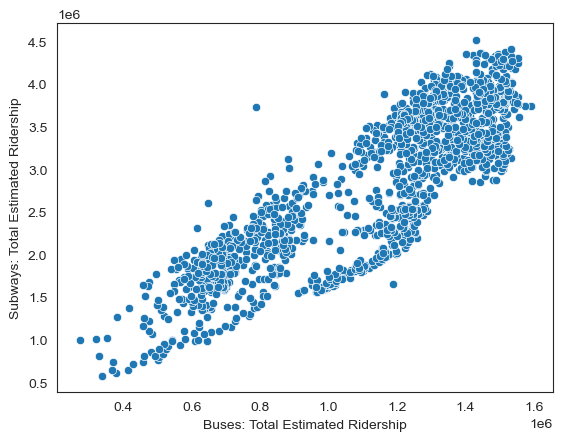

In [48]:
sns.scatterplot(x=df['Buses: Total Estimated Ridership'],y=df['Subways: Total Estimated Ridership'])

In [49]:
df.columns

Index(['Date', 'Subways: Total Estimated Ridership',
       'Subways: % of Comparable Pre-Pandemic Day',
       'Buses: Total Estimated Ridership',
       'Buses: % of Comparable Pre-Pandemic Day',
       'LIRR: Total Estimated Ridership',
       'LIRR: % of Comparable Pre-Pandemic Day',
       'Metro-North: Total Estimated Ridership',
       'Metro-North: % of Comparable Pre-Pandemic Day',
       'Access-A-Ride: Total Scheduled Trips',
       'Access-A-Ride: % of Comparable Pre-Pandemic Day',
       'Bridges and Tunnels: Total Traffic',
       'Bridges and Tunnels: % of Comparable Pre-Pandemic Day',
       'Staten Island Railway: Total Estimated Ridership',
       'Staten Island Railway: % of Comparable Pre-Pandemic Day', 'Date_dt',
       'time', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt',
       'pres', 'tsun', 'Avg_Temp_F', 'day_of_week'],
      dtype='object')

In [56]:
df.dropna(subset=['tmax','Access-A-Ride: % of Comparable Pre-Pandemic Day'],inplace=True)

In [57]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

independent_Var = df['tmax']
dependent_var   = df["Access-A-Ride: % of Comparable Pre-Pandemic Day"]

independent_Var = sm.add_constant(independent_Var)

# Fit and summarize OLS model
# y, X.astype(float)
linearModel = sm.OLS(dependent_var, (independent_Var).astype(float))
results = linearModel.fit()
print(results.summary())

                                           OLS Regression Results                                          
Dep. Variable:     Access-A-Ride: % of Comparable Pre-Pandemic Day   R-squared:                       0.013
Model:                                                         OLS   Adj. R-squared:                  0.012
Method:                                              Least Squares   F-statistic:                     18.96
Date:                                             Thu, 07 Aug 2025   Prob (F-statistic):           1.42e-05
Time:                                                     20:20:47   Log-Likelihood:                 199.85
No. Observations:                                             1470   AIC:                            -395.7
Df Residuals:                                                 1468   BIC:                            -385.1
Df Model:                                                        1                                         
Covariance Type:            

In [58]:
df.columns

Index(['Date', 'Subways: Total Estimated Ridership',
       'Subways: % of Comparable Pre-Pandemic Day',
       'Buses: Total Estimated Ridership',
       'Buses: % of Comparable Pre-Pandemic Day',
       'LIRR: Total Estimated Ridership',
       'LIRR: % of Comparable Pre-Pandemic Day',
       'Metro-North: Total Estimated Ridership',
       'Metro-North: % of Comparable Pre-Pandemic Day',
       'Access-A-Ride: Total Scheduled Trips',
       'Access-A-Ride: % of Comparable Pre-Pandemic Day',
       'Bridges and Tunnels: Total Traffic',
       'Bridges and Tunnels: % of Comparable Pre-Pandemic Day',
       'Staten Island Railway: Total Estimated Ridership',
       'Staten Island Railway: % of Comparable Pre-Pandemic Day', 'Date_dt',
       'time', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt',
       'pres', 'tsun', 'Avg_Temp_F', 'day_of_week'],
      dtype='object')

In [63]:
df['Metro-North: % of Comparable Pre-Pandemic Day']

0       0.17
1       0.18
2       0.17
3       0.13
4       0.13
        ... 
1465    0.88
1466    0.75
1467    0.82
1468    0.78
1469    0.74
Name: Metro-North: % of Comparable Pre-Pandemic Day, Length: 1470, dtype: float64

In [61]:
df['tmax']= df['tmax'].astype(float)
df['Subways: % of Comparable Pre-Pandemic Day']= df['Subways: % of Comparable Pre-Pandemic Day'].astype(float)
df['prcp']= df['prcp'].astype(float)


In [62]:
independent_Var = df[['tmax','prcp']]
dependent_var = df['Subways: % of Comparable Pre-Pandemic Day']
# add the constant value to the indpendet variables
independent_Var = sm.add_constant(independent_Var)

# Fit and summarize OLS model
linearModel = sm.OLS(dependent_var, independent_Var)
results = linearModel.fit()
print(results.summary())

                                        OLS Regression Results                                       
Dep. Variable:     Subways: % of Comparable Pre-Pandemic Day   R-squared:                       0.010
Model:                                                   OLS   Adj. R-squared:                  0.008
Method:                                        Least Squares   F-statistic:                     7.168
Date:                                       Thu, 07 Aug 2025   Prob (F-statistic):           0.000798
Time:                                               20:23:34   Log-Likelihood:                 783.82
No. Observations:                                       1470   AIC:                            -1562.
Df Residuals:                                           1467   BIC:                            -1546.
Df Model:                                                  2                                         
Covariance Type:                                   nonrobust                      